Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

### snippet 4.8

Show first 5 rows of DataFrame df

In [4]:
first(df, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Use only adults

In [5]:
df2 = filter(row -> row[:age] >= 18, df);

Plot the densities.

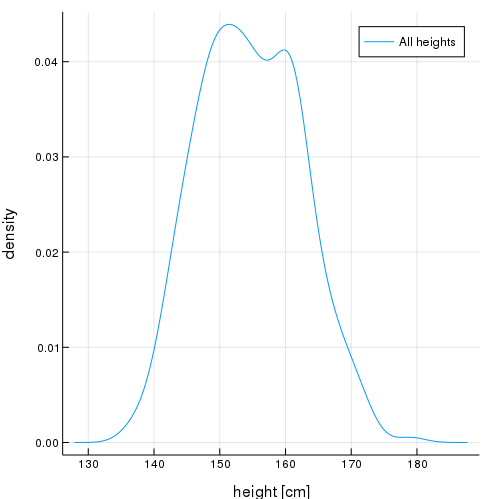

In [6]:
density(df2[:height], lab="All heights", xlab="height [cm]", ylab="density")

Filter on sex to see if it is bi-modal

In [7]:
female_df = filter(row -> row[:male] == 0, df2);
male_df = filter(row -> row[:male] == 1, df2);
first(male_df, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,156.845,53.0419,41.0,1
3,163.83,62.9926,35.0,1
4,168.91,55.48,27.0,1
5,165.1,54.4877,54.0,1


Is it bi-modal?

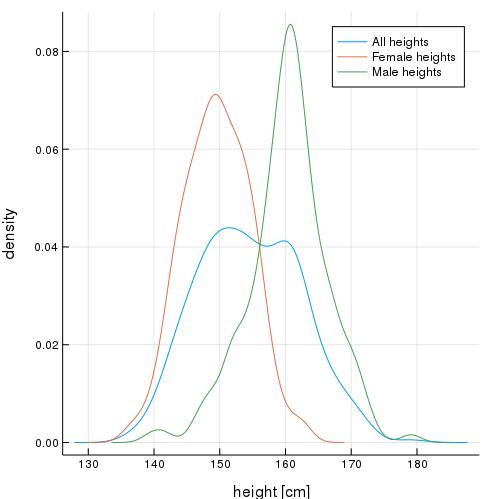

In [8]:
density!(female_df[:height], lab="Female heights")
density!(male_df[:height], lab="Male heights")

Use data from m4.1s

Check if the m4.1s.jls file is present. If not, run the model.

In [9]:
!isfile(joinpath(ProjDir, "m4.1s.jls")) && include(joinpath(ProjDir, "m4.1s.jl"))

chn = deserialize(joinpath(ProjDir, "m4.1s.jls"))

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[7.89583 154.019; 7.51289 154.051; … ; 8.05592 154.849; 7.32307 154.26]

Union{Missing, Float64}[7.70158 154.708; 7.92544 154.388; … ; 7.76274 153.485; 8.15004 153.824]

Union{Missing, Float64}[7.55194 154.605; 8.09058 154.559; … ; 7.72737 154.31; 7.83741 154.785]

Union{Missing, Float64}[7.63013 155.233; 7.33167 154.204; … ; 7.7306 155.442; 7.99791 154.91]

Describe the draws

In [10]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
          Mean        SD       Naive SE          MCSE         ESS
sigma   7.7676004 0.30000805 0.0047435437 6.59994549252×10⁻³ 1000
   mu 154.6139367 0.42346233 0.0066955274 6.67519445974×10⁻³ 1000

Quantiles:
         2.5%      25.0%     50.0%      75.0%       97.5%  
sigma   7.213924   7.56134   7.75672   7.9672175   8.396594
   mu 153.785800 154.32400 154.62250 154.9012500 155.446125



### snippet 4.13

Plot the density of posterior draws

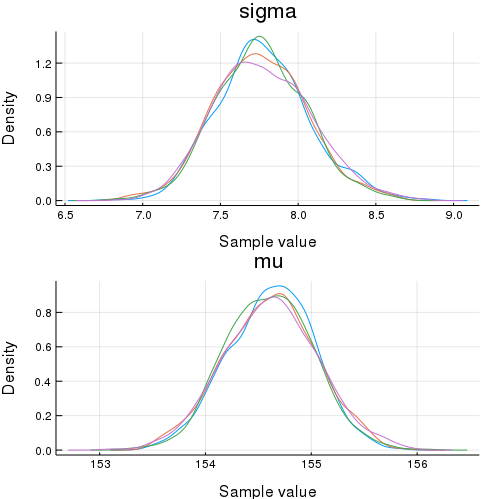

In [11]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

End of `clip-07-13s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*